# Test Faster-R-CNN Model

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import pickle
from gluoncv import data, utils
import torch
import numpy as np

from detectron2.modeling import build_model
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

D:\Utilisateurs\anaconda3\envs\new\lib\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.11.0` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [23]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.DEVICE = 'cpu'

model = DefaultPredictor(cfg)

In [1]:
image_path = 'test_images/test_3.jpeg'
im_fname = Image.open(image_path)
plt.figure(figsize=(20,10))
plt.imshow(im_fname)

NameError: name 'Image' is not defined

In [47]:
x, reshaped_img = data.transforms.presets.rcnn.load_test(image_path)

In [48]:
output = model(reshaped_img)

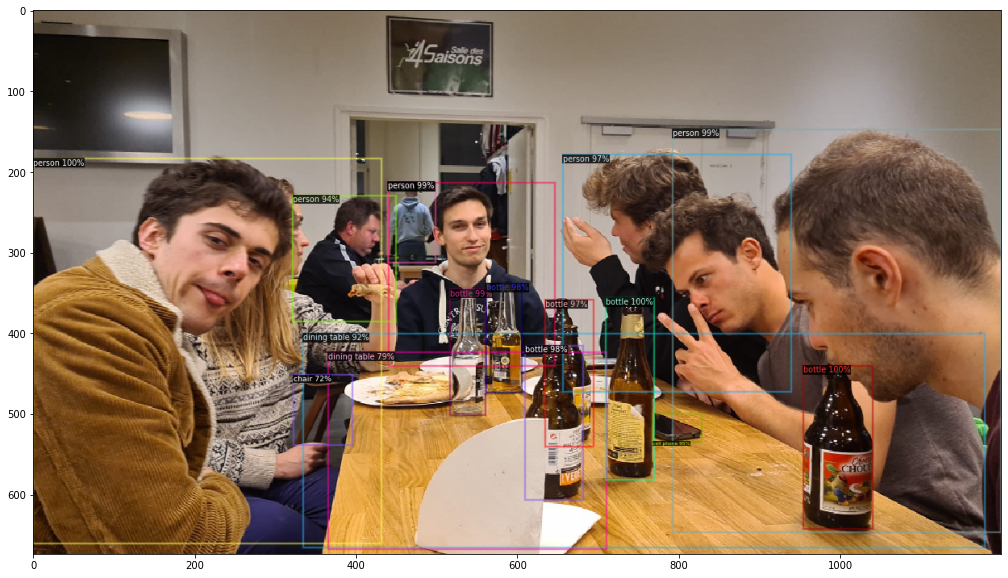

In [49]:
visualizer = Visualizer(reshaped_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
vis = visualizer.draw_instance_predictions(output["instances"].to("cpu"))
img = Image.fromarray(np.uint8(vis.get_image()[:, :, ::-1]))
plt.figure(figsize=(20,10))
plt.imshow(img)

### Fine Tuning du modèle

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import sys
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
data_transforms = transforms.Compose([
    transforms.Resize([600, 600]),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [ ]:
image_directory = "../scraping/data/images"
dataset_full = datasets.ImageFolder(image_directory, data_transforms)

In [ ]:
samples_train, samples_test = train_test_split(dataset_full.samples)
samples_train, samples_val = train_test_split(samples_train,test_size=0.2)

In [ ]:
dataset_train = datasets.ImageFolder(image_directory, data_transforms)
dataset_train.samples = samples_train
dataset_train.imgs = samples_train
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True, num_workers=4)

dataset_val = datasets.ImageFolder(image_directory, data_transforms)
dataset_val.samples = samples_val
dataset_val.imgs = samples_val

dataset_test = datasets.ImageFolder(image_directory, data_transforms)
dataset_test.samples = samples_test
dataset_test.imgs = samples_test

torch.manual_seed(42)